[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


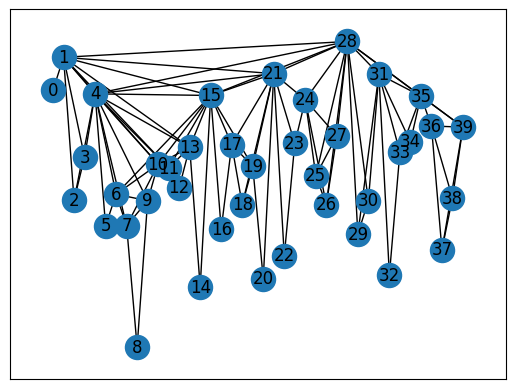

In [4]:
from ts2vg import NaturalVG
import networkx as nx
import matplotlib.pyplot as plt
# time = [5, 10, 6, 7, 14,12,10,5,12]
import pandas as pd
db=pd.read_csv("C:\\Users\\NISHANT DEY\\Downloads\\1981-2020 Wet Bulb Temparature (5).csv")
time=db["JAN"]
steps=40
vg = NaturalVG()
# directed, weighted
vg.build(time)
edges = vg.edges
edges.sort()
# for i in range(len(edges)):
#     # edges[i][0]=edges[i][0]+1
#     # edges[i][1]=edges[i][1]+1
#     print(edges[i][0]+1, end=",")
#     print(edges[i][1]+1)

ft = vg.adjacency_matrix()
print(ft) 

# print((edges))
nxg = vg.as_networkx()

y = vg.node_positions() #node_positions says that first node has how much value, 2nd node has how much value,
# print(y)

nx.draw_networkx(nxg, pos=vg.node_positions())

In [5]:
print(nxg.degree())
#finding average degree
d=(dict(nxg.degree()))
l=0;count=0
for i in d:
        count=count+d[i]
        l=l+1
print("average degree", count/l)
#indegree, outdegree for directed graphs

[(0, 1), (1, 10), (2, 3), (3, 3), (4, 13), (10, 8), (11, 6), (13, 7), (15, 12), (21, 11), (28, 13), (5, 2), (6, 6), (7, 5), (9, 5), (8, 2), (12, 2), (14, 2), (16, 2), (17, 5), (19, 5), (18, 3), (20, 2), (22, 2), (23, 3), (24, 6), (25, 4), (26, 4), (27, 4), (29, 3), (30, 3), (31, 7), (35, 6), (39, 5), (32, 2), (33, 4), (34, 3), (36, 4), (37, 3), (38, 3)]
average degree 4.85


In [6]:
import numpy as np
#local random walk
#creating p matrix
axy=vg.adjacency_matrix()
print(type(axy))
p=[]
nodes=list(nxg.nodes())
for i in range(0, len(nodes),1):
        p_row=[]
        for j in range(0,len(nodes),1):
                degree=nx.degree(nxg, i)
                # print(degree)
                p_row.append(axy[i][j]/degree)
        p.append(p_row)
        # p_row=[]
p=np.array(p)
# print(p)
#transposing p matrix
pt=p.transpose()
# print(pt)

<class 'numpy.ndarray'>


In [7]:
#creating pie_x_0 matrix for all nodes. it is a ma
pie_0node_0t=np.array([[1],[0],[0],[0],[0],[0],[0],[0],[0]])
#we want to create a function that can define the pie matrixes at the 0th step
def create_pie(n, position):
        #n is no of nodes
        #for general node
        final=[]
        for i in range(n):
            each=[]
            if (i==position):
                each.append(1)
            else:
                each.append(0)
            final.append(each)
        return final

pie_0_0=create_pie(nx.number_of_nodes(nxg),1)
print(pie_0_0)

[[0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]


In [8]:
#we want to generate this to create pie_0 matrix for all nodes to at t=0
def create_all_pie(n):
    pie_x_0=[] #this means all nodes and at time t=0
    for i in range(n):
        each=create_pie(n, i)
        pie_x_0.append(each)
    return pie_x_0


pie_x_0=create_all_pie(nx.number_of_nodes(nxg)) #for node 0 
# for i in range(nx.number_of_nodes(nxg)):
#     print(pie_x_0[i])

pie_x_0=np.array(pie_x_0)
# print(pie_x_0, end="   ")

In [9]:
#now we want to create pie matrixes for all nodes at time t=1
# πx  t = PT . πx(t-1) 

#little manual testig
pie_1_1=np.dot(pt,pie_x_0[1])



In [10]:
pie_x_1=[] #pie matrix for all nodes at t=1

#doing changes to automate:
pie_x_t=[] #pie_x_0 has already been made. so we will start from t=1


pie_x_t.append(pie_x_0)
for j in range(1, steps+1):
    for i in range(nx.number_of_nodes(nxg)):
        each=np.dot(pt,pie_x_t[j-1][i])
        pie_x_1.append(each)
    pie_x_t.append(np.array(pie_x_1))
    pie_x_1=[]

#pie_x_t has all the pie matrixes



In [11]:
# similarity at all t 
import operator
e = nx.number_of_edges(nxg)
dictionary_t1 = np.zeros([nx.number_of_nodes(nxg), nx.number_of_nodes(nxg)], dtype=float)

# dictionary_t1_sorted = sorted(
#     dictionary_t1.items(), key=operator.itemgetter(1), reverse=True)
# for key, value in dictionary_t1_sorted:
#     print(key, value)

# automation
similarity_all_nodes_t = []
for k in range(1, steps+1):#steps +1
    for i in range(nx.number_of_nodes(nxg)):
        for j in range(i, nx.number_of_nodes(nxg)):
            if (i != j):
                similarity = (nx.degree(nxg, i) * pie_x_t[k][i][j][0])/(2*e) + (nx.degree(nxg, j) * pie_x_t[k][j][i][0])/(2*e)
                dictionary_t1[i][j] = similarity
    similarity_all_nodes_t.append(dictionary_t1)
    # similarity_all_nodes_t[k-1]=dictionary_t1
    dictionary_t1 = np.zeros([nx.number_of_nodes(nxg), nx.number_of_nodes(nxg)], dtype=float)
 



In [12]:
# dictionary_srw_t5={} #superposed random walk at t=5
dictionary_srw_t5 = np.zeros([nx.number_of_nodes(nxg), nx.number_of_nodes(nxg)], dtype=float)
srw_sim_score=0
for i in range(nx.number_of_nodes (nxg)):
    for j in range(i, nx.number_of_nodes(nxg)):
        if(i!=j):
            for k in range(steps):
                srw_sim_score=srw_sim_score+similarity_all_nodes_t[k][i][j]
            dictionary_srw_t5[i][j]=srw_sim_score
            srw_sim_score=0

            # srw_sim_score=similarity_all_nodes_t[][(i,j)]+similarity_all_nodes_t[(i,j)]+similarity_all_nodes_t[(i,j)]+similarity_all_nodes_t[(i,j)]+similarity_all_nodes_t[(i,j)]
            # dictionary_srw_t5[(i,j)]=srw_sim_score

# print(dictionary_srw_t5)
# for key, value in dictionary_srw_t5.items():
#     print(key, value)

In [13]:
def find_max_value_and_position(dictionary_srw_t5):
    max_value = dictionary_srw_t5[0][0]
    max_position = (0, 0)
    for i in range(len(dictionary_srw_t5)):
        for j in range(len(dictionary_srw_t5[0])):
            if dictionary_srw_t5[i][j] > max_value:
                max_value = dictionary_srw_t5[i][j]
                max_position = (i, j)
    return max_value, max_position
hello_maxi=find_max_value_and_position(dictionary_srw_t5)
print(hello_maxi)

(0.37785965897501067, (4, 15))


In [14]:
# as per the output, (1,4) is the most similar nodes and similarity score of 0.3244741215574549

In [15]:
tm=hello_maxi[1][1]#these are indexes starting from 0
ym=time[tm]
tn=hello_maxi[1][0]
yn=time[tn]
print(ym, yn)

14.91 14.94


In [16]:
#to find the future node in the network, we use eqn 15
tn_plus_1=len(time)#this also must be index so no +1
print(tn_plus_1)
#initial forecasting
yn_plus_1=abs((ym-yn)/(tm-tn))*(tn_plus_1-tm)+ym
print(yn_plus_1)

40
14.978181818181817


In [17]:
#equation 16
d_m_to_n=abs(tm-tn)
d_m_to_nplus1=abs(tm-tn_plus_1) #eq17
d_n_to_nplus1=abs(tn-tn_plus_1)
print(d_m_to_n,d_m_to_nplus1,d_n_to_nplus1)

11 25 36


In [18]:
#finding weight coefficient eqn 19
wn=d_m_to_n/d_m_to_nplus1
wn_plus_1=1-wn
print(wn,wn_plus_1)

0.44 0.56


In [19]:
#eqn 21
yn_plus_1=wn_plus_1*yn_plus_1+wn*yn
print(yn_plus_1)

14.961381818181817
